In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
!pip install imblearn
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [276]:
df_csv=pd.read_csv("/content/fma-rock-vs-hiphop.csv")
df_csv

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [277]:
df_csv.shape

(17734, 21)

In [278]:
df_json=pd.read_json("/content/echonest-metrics.json")
df_json

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [279]:
df_csv.isnull().sum()

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

In [280]:
df_csv=df_csv.drop(df_csv[['composer','date_recorded','information','language_code','lyricist','publisher']],axis=1)

In [281]:
df_csv=df_csv.fillna(method='ffill')
df_csv.isnull().sum()

track_id        0
bit_rate        0
comments        0
date_created    0
duration        0
favorites       0
genre_top       0
genres          0
genres_all      0
interest        0
license         0
listens         0
number          0
tags            0
title           0
dtype: int64

In [282]:
df_csv=df_csv.apply(LabelEncoder().fit_transform)

In [283]:
df=pd.merge(df_json,df_csv)
df

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,bit_rate,...,favorites,genre_top,genres,genres_all,interest,license,listens,number,tags,title
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,1028,...,6,0,100,59,1871,22,1139,6,281,13875
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,1028,...,3,0,100,59,1086,22,933,5,281,12589
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,1028,...,0,1,264,168,1884,22,1468,0,281,10144
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,372,...,1,1,181,117,228,16,188,0,281,8411
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,132,...,0,1,214,130,449,22,76,6,281,6831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,17718,0.970180,0.501342,0.250595,0.747627,0.476116,0.037085,80.067,0.399386,1679,...,0,1,162,80,444,53,369,8,281,6349
4448,17720,0.950490,0.435698,0.732042,0.947082,0.112163,0.031306,111.985,0.741920,1679,...,2,0,98,227,1037,0,849,2,184,11554
4449,17721,0.985811,0.448653,0.327935,0.901941,0.131481,0.074555,125.450,0.067449,1679,...,3,0,98,227,1300,0,1130,1,184,13553
4450,17722,0.468288,0.309355,0.886097,0.076086,0.348318,0.511985,69.928,0.118684,1679,...,6,0,98,227,1987,0,1448,3,184,11200


In [284]:
df.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
bit_rate            0
comments            0
date_created        0
duration            0
favorites           0
genre_top           0
genres              0
genres_all          0
interest            0
license             0
listens             0
number              0
tags                0
title               0
dtype: int64

In [285]:
df.corrwith(df['genre_top']).abs().sort_values(ascending=False)

genre_top           1.000000
genres              0.275864
bit_rate            0.263923
genres_all          0.232714
listens             0.159586
track_id            0.157297
date_created        0.155992
interest            0.140439
favorites           0.096807
number              0.086956
license             0.072316
danceability        0.056039
duration            0.048926
energy              0.036946
instrumentalness    0.029039
title               0.028020
liveness            0.026763
tags                0.025142
comments            0.019423
acousticness        0.011402
tempo               0.009082
valence             0.008683
speechiness         0.003052
dtype: float64

In [286]:
df=df.drop(df[['speechiness','valence','tempo','acousticness','comments','tags','liveness','title','instrumentalness','energy']],axis=1)

[]

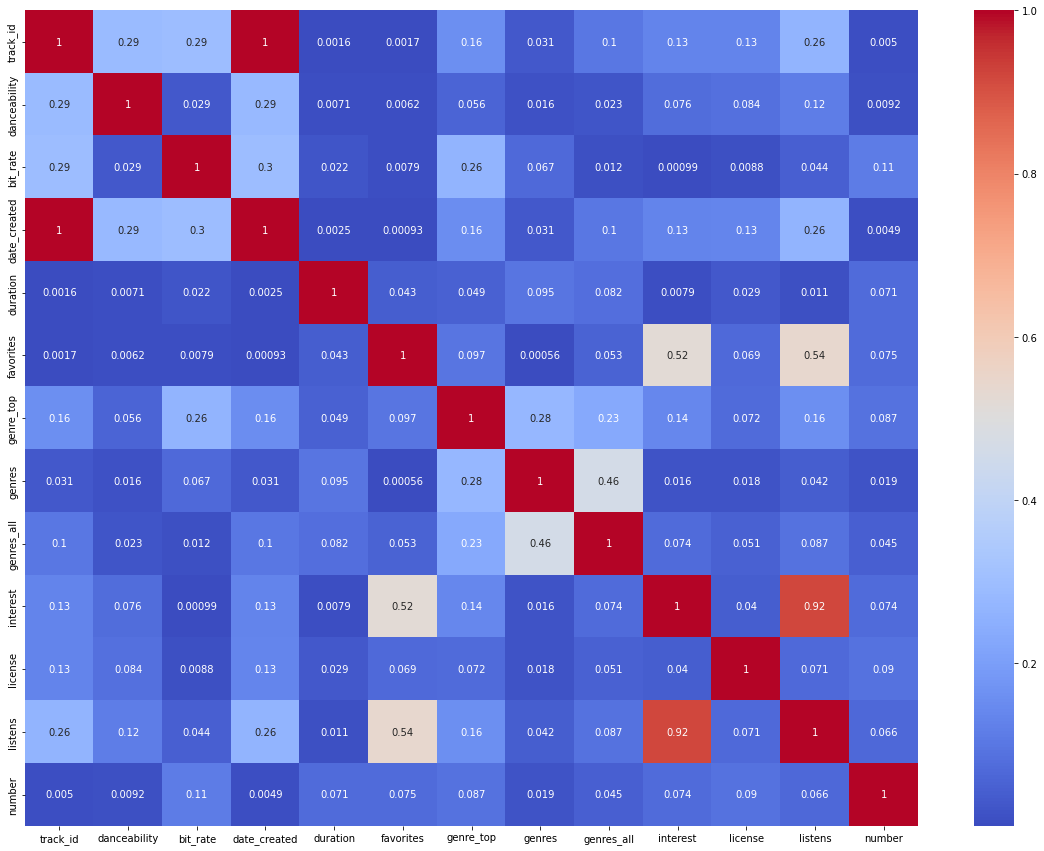

In [287]:
corrm=df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corrm, cmap="coolwarm", annot=True)
plt.plot()

In [288]:
df.head()

,track_id,danceability,bit_rate,date_created,duration,favorites,genre_top,genres,genres_all,interest,license,listens,number
0,2,0.675894,1028,28,204,6,0,100,59,1871,22,1139,6
1,3,0.528643,1028,3,205,3,0,100,59,1086,22,933,5
2,5,0.745566,1028,5,506,0,1,264,168,1884,22,1468,0
3,10,0.658179,372,10,675,1,1,181,117,228,16,188,0
4,134,0.513238,132,135,241,0,1,214,130,449,22,76,6


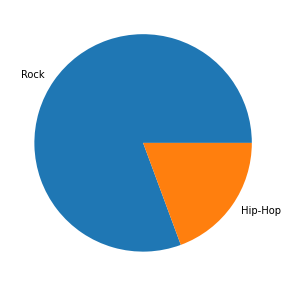

In [289]:
plt.figure(figsize=(5,5))
plt.pie(df['genre_top'].value_counts()/len(df)*100,labels=['Rock','Hip-Hop'])
plt.show()

In [290]:
df['genre_top'].value_counts()

1    3590
0     862
Name: genre_top, dtype: int64

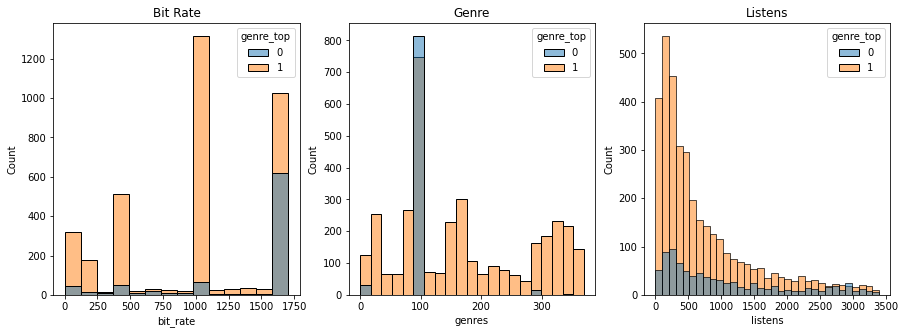

In [291]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.histplot(x="bit_rate",hue='genre_top',data=df,ax=axes[0])
axes[0].set_title("Bit Rate")

sns.histplot(x='genres',data=df,hue='genre_top',ax=axes[1])
axes[1].set_title('Genre')

sns.histplot(x='listens',hue='genre_top',data=df,ax=axes[2])
axes[2].set_title('Listens')

plt.show()

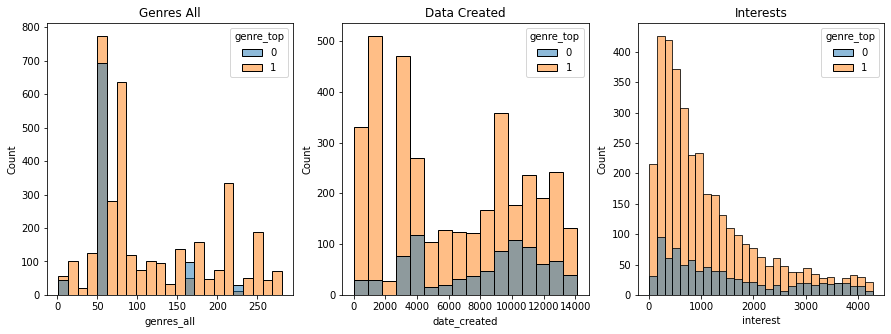

In [292]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.histplot(x="genres_all",hue='genre_top',data=df,ax=axes[0])
axes[0].set_title("Genres All")

sns.histplot(x='date_created',data=df,hue='genre_top',ax=axes[1])
axes[1].set_title('Data Created')

sns.histplot(x='interest',hue='genre_top',data=df,ax=axes[2])
axes[2].set_title('Interests')

plt.show()

In [293]:
df.isnull().sum()

track_id        0
danceability    0
bit_rate        0
date_created    0
duration        0
favorites       0
genre_top       0
genres          0
genres_all      0
interest        0
license         0
listens         0
number          0
dtype: int64

In [294]:
df.shape

(4452, 13)

In [295]:
X=df.drop('genre_top',axis=1)
Y=df['genre_top']

In [296]:
rus=RandomUnderSampler(random_state=0)
X_resampled,Y_resampled=rus.fit_resample(X,Y)

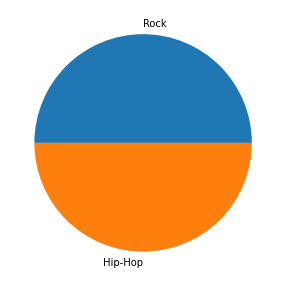

In [297]:
plt.figure(figsize=(5,5))
plt.pie(pd.DataFrame(Y_resampled).value_counts()/len(df)*100,labels=['Rock','Hip-Hop'])
plt.show()

In [298]:
X_resampled.shape

(1724, 12)

In [299]:
Y_resampled.shape

(1724,)

In [300]:
poly=StandardScaler()
X_resampled=poly.fit_transform(X_resampled)

In [301]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,Y_resampled,random_state=42,test_size=0.2)

In [325]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [326]:
y_predicted=knn_model.predict(x_test)

OVERALL RESULT, USING Knn
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       186
           1       0.92      0.81      0.86       159

    accuracy                           0.88       345
   macro avg       0.89      0.88      0.88       345
weighted avg       0.88      0.88      0.88       345

Accuracy:  0.881159420289855


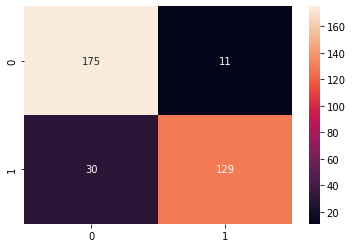

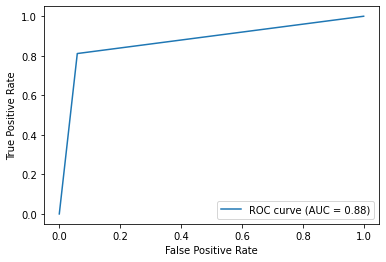

In [327]:
print('OVERALL RESULT, USING Knn')
print(classification_report(y_test,y_predicted))
print("Accuracy: ",accuracy_score(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()
plt.show()

In [328]:
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [329]:
y_predicted=LR_model.predict(x_test)

OVERALL RESULT, USING LogisticRegression
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       186
           1       0.79      0.72      0.76       159

    accuracy                           0.79       345
   macro avg       0.79      0.78      0.78       345
weighted avg       0.79      0.79      0.78       345

Accuracy:  0.7855072463768116


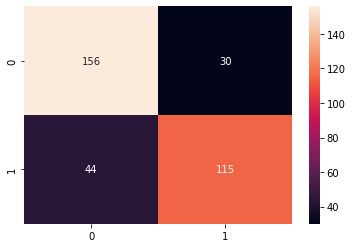

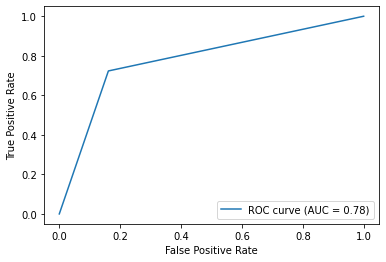

In [330]:
print('OVERALL RESULT, USING LogisticRegression')
print(classification_report(y_test,y_predicted))
print("Accuracy: ",accuracy_score(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()
plt.show()

In [331]:
DT_model=tree.DecisionTreeClassifier(max_depth=3,max_leaf_nodes=6)
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6)

In [332]:
y_predicted_tree=DT_model.predict(x_test)

OVERALL RESULT, USING DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       186
           1       0.98      1.00      0.99       159

    accuracy                           0.99       345
   macro avg       0.99      0.99      0.99       345
weighted avg       0.99      0.99      0.99       345

Accuracy:  0.9884057971014493


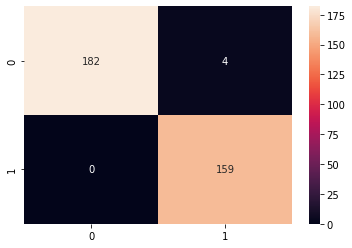

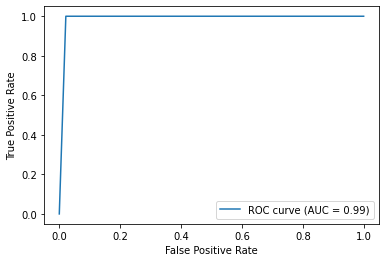

In [333]:
print('OVERALL RESULT, USING DecisionTreeClassifier')
print(classification_report(y_test,y_predicted_tree))
print("Accuracy: ",accuracy_score(y_test,y_predicted_tree))
plt.show()

sns.heatmap(confusion_matrix(y_test,y_predicted_tree),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predicted_tree)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='ROC curve')
display.plot()
plt.show()

In [312]:
columns=['track_id', 'acousticness', 'danceability', 'valence', 'bit_rate',
       'date_created', 'genres_all', 'interest', 'license',
       'listens', 'number']
X.columns

Index(['track_id', 'danceability', 'bit_rate', 'date_created', 'duration',
       'favorites', 'genres', 'genres_all', 'interest', 'license', 'listens',
       'number'],
      dtype='object')

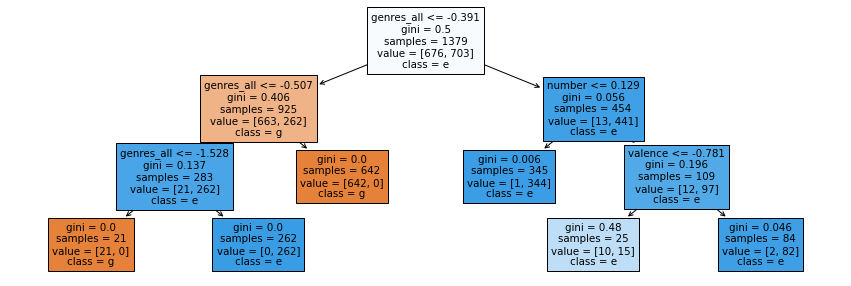

In [313]:
plt.figure(figsize=(15,5))
tree_plot=tree.plot_tree(DT_model,feature_names=columns,class_names='genre_top',filled=True)
plt.show()

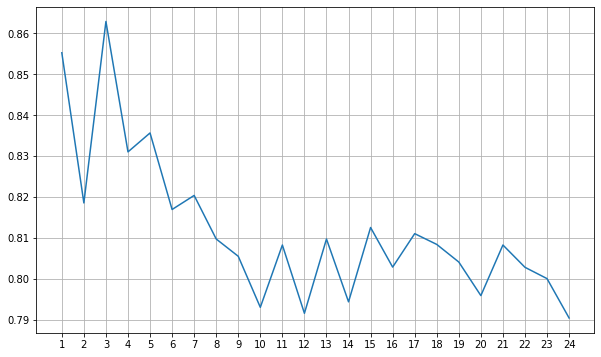

In [321]:
f1 = []
for k in range(1,25):
    knn_model =KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_predict = knn_model.predict(x_test)
    f1.append(metrics.f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

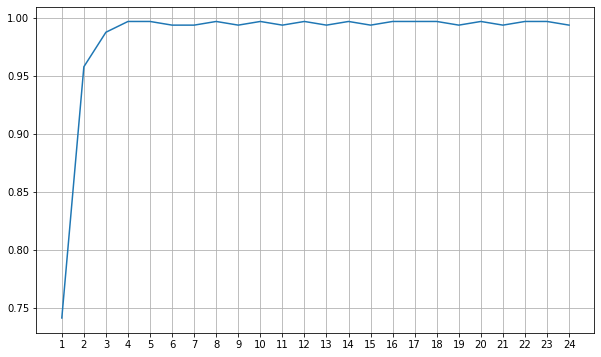

In [314]:
f1 = []
for k in range(1,25):
    dt = tree.DecisionTreeClassifier(max_depth=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

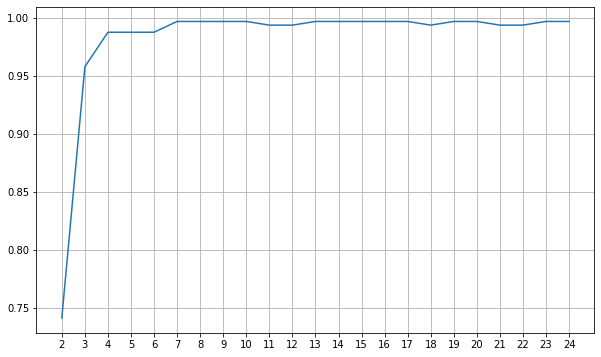

In [315]:
f1 = []
for k in range(2,25):
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(2,25),f1)
plt.xticks(range(2,25))
plt.grid()
plt.show()

My data is not too much as I balanced it. So If I use higher parameters for DecisionTree, it seems to overfit. So I used smaller numbers.

